In [ ]:
#Name: Ritesh Chaudhary
#ID: 2438464
#Assignment 1

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Assigment of Ai/WHR-2024-5CS037.csv");
print(data.head(10))

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

In [ ]:
# Get the number of rows and columns
rows, columns = data.shape

print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 143 rows and 9 columns.


In [ ]:
# List all columns and their data types
print(data.dtypes)


Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [ ]:
 #Calculate the mean, median, and standard deviation for the Score column.
mean_scores = data['score'].mean()
median_score = data['score'].median()
std_dev_score = data['score'].std()

print(f'Mean score: {mean_scores}')
print(f'Median score: {median_score}')
print(f'Standard deviation of score: {std_dev_score}')


Mean score: 5.52758041958042
Median score: 5.785
Standard deviation of score: 1.1707165099442995


In [ ]:
# 2. Identify the country with the highest and lowest happiness scores.
highest_happiness = data.loc[data['score'].idxmax()]
print(f'The country with the highest happiness score is {highest_happiness["Country name"]}')

lowest_happiness = data.loc[data['score'].idxmin()]
print(f'The country with the lowest happiness score is {lowest_happiness["Country name"]}')

The country with the highest happiness score is Finland
The country with the lowest happiness score is Afghanistan


In [ ]:
# Missing Values:
# 1. Check if there are any missing values in the dataset. If so, display the total count for each column.

missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)



Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
# Filtering and Sorting:
# 1. Filter the dataset to show only the countries with a Score greater than 7.5.

filter = data[data['score']>7.5]
print(filter)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [ ]:
# 2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
# top 10 rows.

# Sort the filtered dataset by GDP per Capita in descending order
sorted_data = filter.sort_values(by='Log GDP per capita', ascending=False)
# Display the top 10 rows
top_10 = sorted_data.head(10)
print(top_10)


  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [ ]:
# Create a new column called Happiness Category that categorizes countries into three categories
# based on their Score:

# Low − (Score < 4)
# Medium − (4 ≤ Score ≤ 6)
# High − (Score > 6)

# Add a new column "Happiness Category"
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create the new column
data['Happiness Category'] = data['score'].apply(categorize_happiness)

# Display the first few rows to confirm the changes
print(data[['score', 'Happiness Category']].head(10))

   score Happiness Category
0  7.741               High
1  7.583               High
2  7.525               High
3  7.344               High
4  7.341               High
5  7.319               High
6  7.302               High
7  7.122               High
8  7.060               High
9  7.057               High


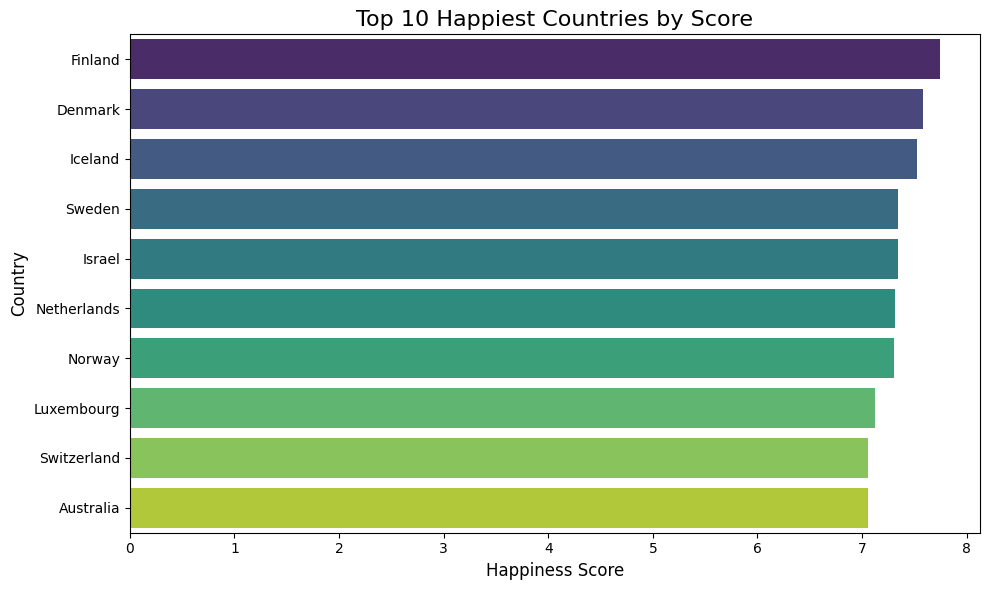

In [ ]:
# 2. Data Visualizations:
# • Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Score' is correctly capitalized and aligned with your dataset's column names
top_10_happiest = data.nlargest(10, 'score')

# Plotting the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_happiest,
    x='score',
    y='Country name',
    hue = "Country name",
    palette='viridis'
)
plt.title('Top 10 Happiest Countries by Score', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()



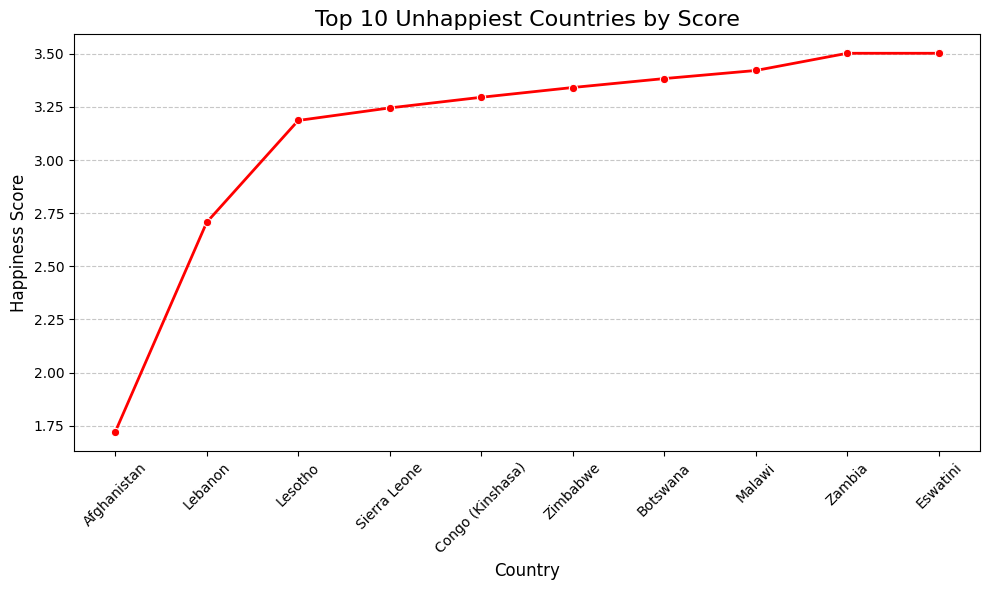

In [ ]:
# Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

# Get the top 10 unhappiest countries by Score
top_10_unhappiest = data.nsmallest(10, 'score')

# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=top_10_unhappiest,
    x='Country name',
    y='score',
    marker='o',  # Add markers for better visualization
    color='red',
    linewidth=2
)
plt.title('Top 10 Unhappiest Countries by Score', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

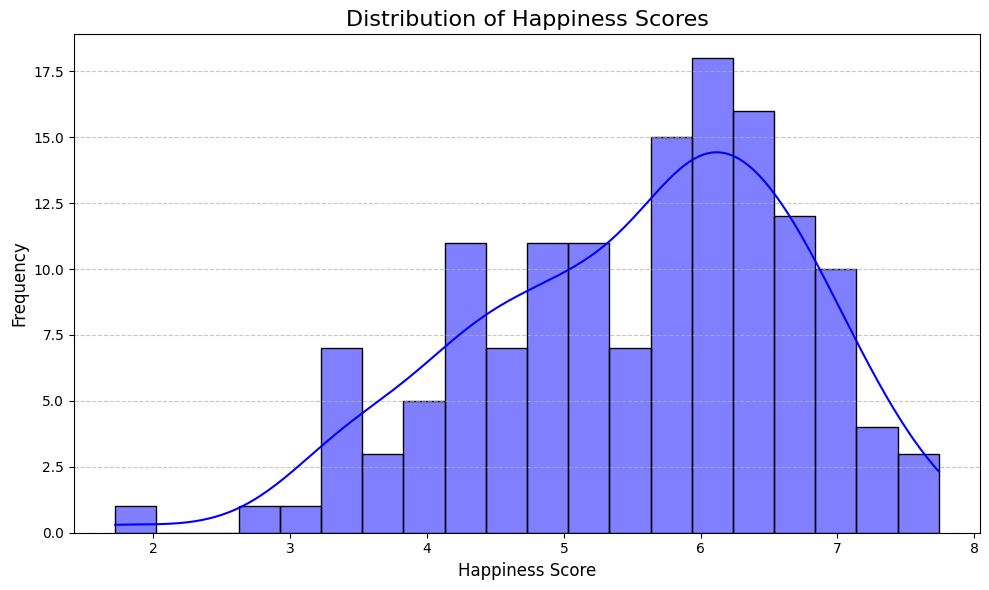

In [ ]:
# Plot a histogram for the Score column to show its distribution and also interpret.

# Plotting the histogram for the 'Score' column
plt.figure(figsize=(10, 6))
sns.histplot(
    data=data,
    x='score',
    kde=True,  # Include a kernel density estimate (KDE) for smoother visualization
    bins=20,   # Adjust the number of bins for better granularity
    color='blue'  # Set the color for the histogram
)
plt.title('Distribution of Happiness Scores', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

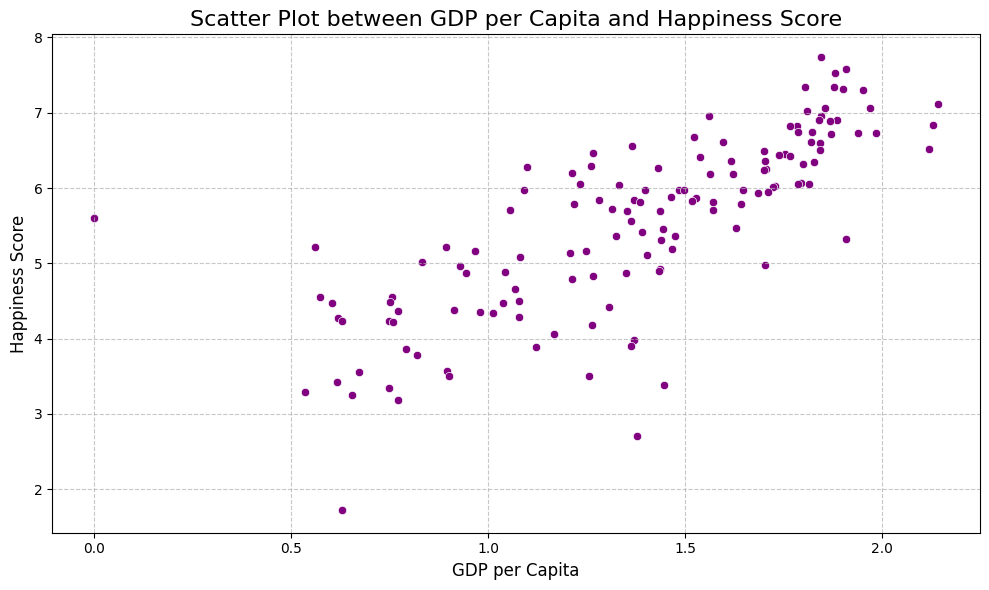

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the scatter plot between 'GDP per Capita' and 'Score'
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='Log GDP per capita',
    y='score',
    color='purple',  # Set color for the scatter plot
    marker='o'       # Use circular markers for each point
)
plt.title('Scatter Plot between GDP per Capita and Happiness Score', fontsize=16)
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:

#3.2 Problem 2 Some Advanced Data Exploration Task
#Task 1 Setup Task Preparing the South-Asia Dataset
#.1
#  Define the countries in South Asia with a list for example:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]
print(south_asian_countries)

['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Srilanka']


In [ ]:
#.2
#use the list from step- 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
filtered_data = data[data['Country name'].isin(south_asian_countries)]
print(filtered_data)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783             Medium  
107                      0.074

In [ ]:
#.3
filtered_data.to_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv', index=False)

In [ ]:
#Task - 2 - Composite Score Ranking:
#.1


# Create a copy of the data to avoid modifying the original
SouthAsia = filtered_data.copy()

# Calculate Composite_Score
SouthAsia['Composite_Score'] = 0.40 * SouthAsia['Log GDP per capita'] + 0.30 * SouthAsia['Social support'] + 0.30 * SouthAsia['Healthy life expectancy']

# Display the result with Country name and Composite_Score
print(SouthAsia[['Country name', 'Composite_Score']])


    Country name  Composite_Score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
128   Bangladesh           0.6774
142  Afghanistan           0.3238


In [ ]:
#.2
# Assuming 'filtered_data' contains the South Asian countries data
SouthAsia = filtered_data.copy()  # Create a copy to avoid modifying the original

# Calculate Composite_Score based on the provided formula
SouthAsia['Composite_Score'] = (0.40 * SouthAsia['Log GDP per capita'] +
                                 0.30 * SouthAsia['Social support'] +
                                 0.30 * SouthAsia['Healthy life expectancy'])


# Sort the South Asia DataFrame by Composite_Score in descending order
SouthAsia_sorted = SouthAsia.sort_values(by='Composite_Score', ascending=False)

# Display the top few rows to verify the order
print(SouthAsia_sorted[['Country name', 'Composite_Score']].head())


    Country name  Composite_Score
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


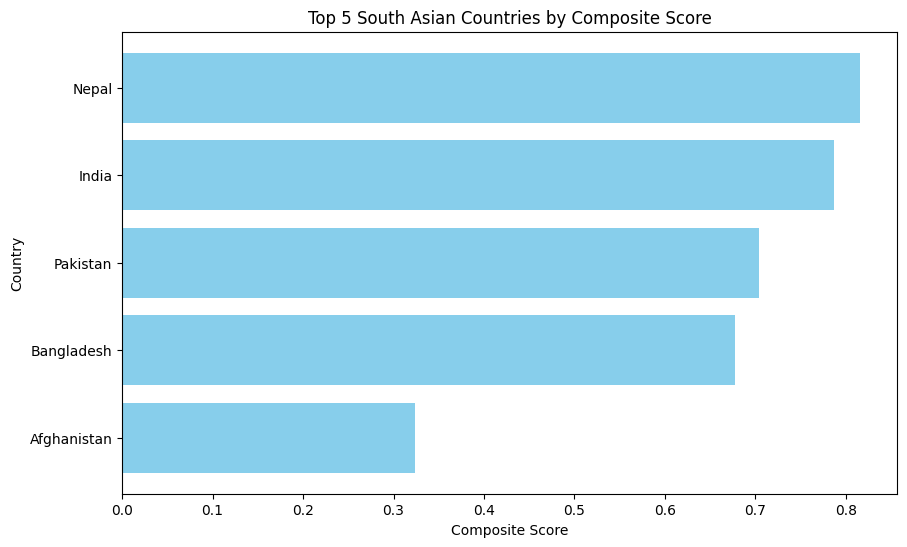

In [ ]:
#.3
# Sort the DataFrame by Composite_Score in descending order and select top 5
top_5_countries = SouthAsia.sort_values(by='Composite_Score', ascending=False).head(5)

# Create a horizontal bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(top_5_countries['Country name'], top_5_countries['Composite_Score'], color='skyblue')

# Add labels and title
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.title('Top 5 South Asian Countries by Composite Score')

# Display the plot
plt.gca().invert_yaxis()  # To have the highest score at the top
plt.show()

Index(['Country name', 'score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual',
       'Happiness Category', 'Composite_Score'],
      dtype='object')


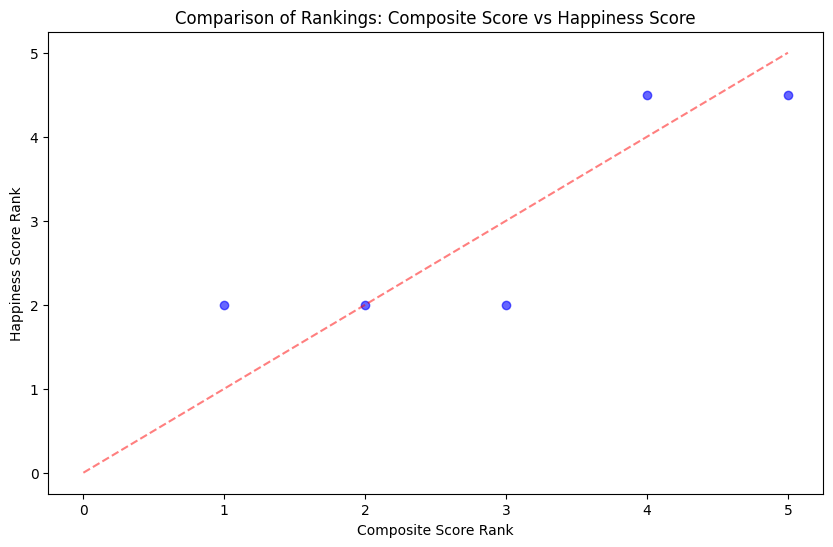

In [ ]:
#.4

# Check the column names first
print(SouthAsia.columns)

# If needed, rename the column to match the expected name
SouthAsia.rename(columns={'Happiness Score': 'Happiness_Score'}, inplace=True)

# Add rankings for Composite Score and Happiness Score
SouthAsia['Composite_Rank'] = SouthAsia['Composite_Score'].rank(ascending=False)
SouthAsia['Happiness_Rank'] = SouthAsia['Happiness Category'].rank(ascending=False)

# Visualize the comparison between the rankings


plt.figure(figsize=(10, 6))

# Scatter plot comparing Composite Rank vs Happiness Rank
plt.scatter(SouthAsia['Composite_Rank'], SouthAsia['Happiness_Rank'], color='blue', alpha=0.6)

# Add labels and title
plt.xlabel('Composite Score Rank')
plt.ylabel('Happiness Score Rank')
plt.title('Comparison of Rankings: Composite Score vs Happiness Score')

# Add a diagonal line for reference (perfect match would lie on this line)
plt.plot([0, len(SouthAsia)], [0, len(SouthAsia)], linestyle='--', color='red', alpha=0.5)

# Display the plot
plt.show()


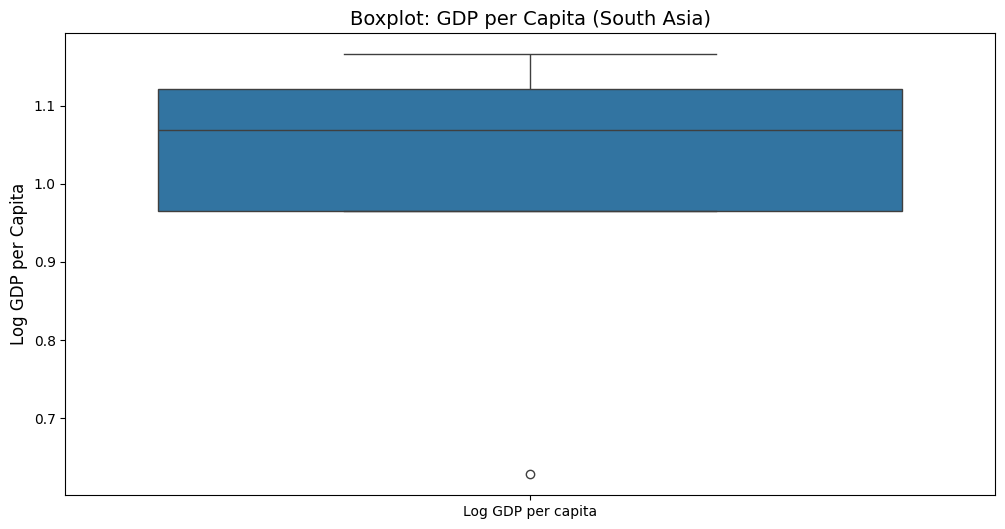


Outliers based on GDP per Capita (IQR method):
  Country name  Log GDP per capita
4  Afghanistan               0.628

SouthAsia with GDP_Z (Z-scores for GDP):
  Country name  Log GDP per capita     GDP_Z
0        Nepal               0.965 -0.129511
1     Pakistan               1.069  0.409255
2        India               1.166  0.911758
3   Bangladesh               1.122  0.683819
4  Afghanistan               0.628 -1.875320

Outliers based on Z-score for GDP per Capita:
Empty DataFrame
Columns: [Country name, Log GDP per capita, GDP_Z]
Index: []


In [ ]:
#Task - 3 - Outlier Detection:
#1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Step 1: Load the South Asian dataset
SouthAsia = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv')

# Step 2: Visualize Outliers using Boxplots for GDP per Capita
plt.figure(figsize=(12, 6))

# Plot boxplot for GDP per Capita
sns.boxplot(data=SouthAsia[['Log GDP per capita']])

# Add title and labels
plt.title('Boxplot: GDP per Capita (South Asia)', fontsize=14)
plt.ylabel('Log GDP per Capita', fontsize=12)
plt.show()

# Step 3: Identify Outliers using IQR (Interquartile Range)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers in 'Log GDP per capita' using IQR
gdp_outliers = detect_outliers_iqr(SouthAsia, 'Log GDP per capita')

# Display outliers for GDP per Capita
print("\nOutliers based on GDP per Capita (IQR method):")
print(gdp_outliers[['Country name', 'Log GDP per capita']])

# Step 4: Create GDP_Z by calculating the Z-score for 'Log GDP per capita'
SouthAsia['GDP_Z'] = zscore(SouthAsia['Log GDP per capita'])

# Display the Z-scores to understand the distribution
print("\nSouthAsia with GDP_Z (Z-scores for GDP):")
print(SouthAsia[['Country name', 'Log GDP per capita', 'GDP_Z']])

# Step 5: Identify outliers using Z-score for GDP per Capita
gdp_z_outliers = SouthAsia[SouthAsia['GDP_Z'].abs() > 3]

# Display Z-score based outliers
print("\nOutliers based on Z-score for GDP per Capita:")
print(gdp_z_outliers[['Country name', 'Log GDP per capita', 'GDP_Z']])




In [ ]:
#.2 Define outliers using the 1.5 × IQR rule.

# Example dataset
data = pd.DataFrame({
    'values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
})

# Step 1: Calculate Q1 and Q3
Q1 = data['values'].quantile(0.25)
Q3 = data['values'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Identify outliers
outliers = data[(data['values'] < lower_bound) | (data['values'] > upper_bound)]

# Print the outliers
print("Outliers based on 1.5 × IQR rule:")
print(outliers)


Outliers based on 1.5 × IQR rule:
    values
10     100



Outliers based on GDP per Capita:
  Country name  Log GDP per capita
4  Afghanistan               0.628

Outliers based on Score:
  Country name  score
4  Afghanistan  1.721


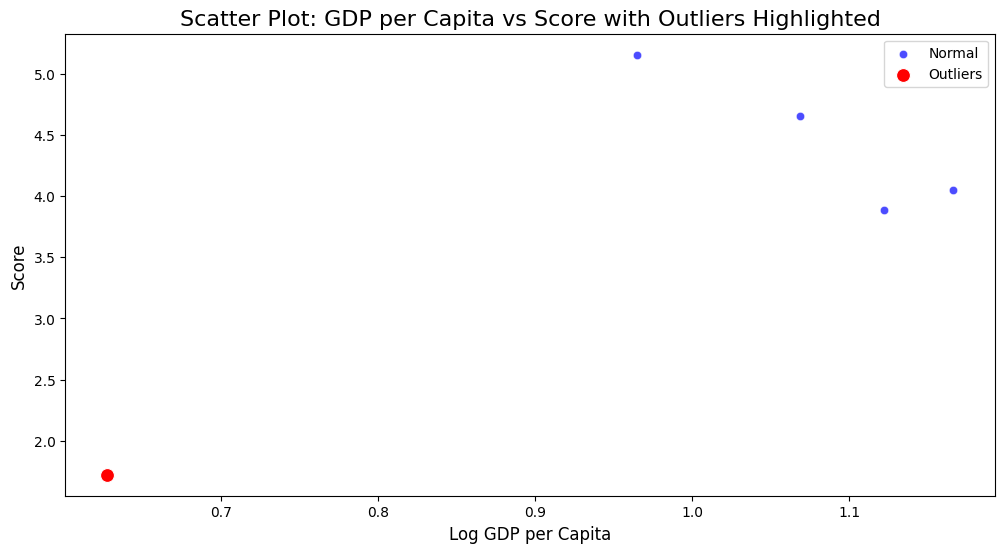

In [ ]:
#.3 Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
# Step 1: Load the South Asian dataset
SouthAsia = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv')

# Step 2: Define a function to detect outliers using IQR (1.5 × IQR rule)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Step 3: Detect outliers in 'Log GDP per capita' and 'score'
gdp_outliers, gdp_lower, gdp_upper = detect_outliers_iqr(SouthAsia, 'Log GDP per capita')
score_outliers, score_lower, score_upper = detect_outliers_iqr(SouthAsia, 'score')

# Display outliers for GDP per Capita and Score
print("\nOutliers based on GDP per Capita:")
print(gdp_outliers[['Country name', 'Log GDP per capita']])

print("\nOutliers based on Score:")
print(score_outliers[['Country name', 'score']])

# Step 4: Scatter plot to highlight outliers in a different color
# Identify outliers for GDP and Score
outlier_countries = pd.concat([gdp_outliers, score_outliers])

# Plotting the scatter plot
plt.figure(figsize=(12, 6))

# Plot GDP per Capita vs Score
sns.scatterplot(x='Log GDP per capita', y='score', data=SouthAsia,
                color='blue', label='Normal', alpha=0.7)

# Highlight outliers in a different color
sns.scatterplot(x=outlier_countries['Log GDP per capita'],
                y=outlier_countries['score'],
                color='red', label='Outliers', s=100)

# Add labels and title
plt.title('Scatter Plot: GDP per Capita vs Score with Outliers Highlighted', fontsize=16)
plt.xlabel('Log GDP per Capita', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Display the legend
plt.legend()

# Show the plot
plt.show()




#.4 Discuss the characteristics of these outliers and their potential impact on regional averages.
**Outliers in South Asia: Impact on Averages**

- GDP Outliers: The individual country GDP values affect the regional distribution to be higher or lower than mean GDP of the region.

- Happiness Score Outliers: The countries with very high or low scores dominate or vitiate the average regional scores of happiness, often misleading the picture.

Impact:

- Outliers tend to lift or lower averages and provide a false impression of the South Asia region with respect to an average measure of material welfare and other indicators.

Solution:

- Apply median or log-transformation to tackle the issues caused by outliers and derive correct interpretations at the regional level.



In [ ]:
#Task 4 - Explore Trends Across Metrics:
#Task
#1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.

# Load the South Asian dataset
SouthAsia = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv')

# Calculate the Pearson correlation between 'Freedom to Make Life Choices', 'Generosity', and 'score'
correlation_freedom_score = SouthAsia['Freedom to make life choices'].corr(SouthAsia['score'])
correlation_generosity_score = SouthAsia['Generosity'].corr(SouthAsia['score'])

# Display the correlation values
print(f"Pearson correlation between 'Freedom to Make Life Choices' and 'Score': {correlation_freedom_score}")
print(f"Pearson correlation between 'Generosity' and 'Score': {correlation_generosity_score}")


Pearson correlation between 'Freedom to Make Life Choices' and 'Score': 0.801497903141921
Pearson correlation between 'Generosity' and 'Score': 0.8773326267276359


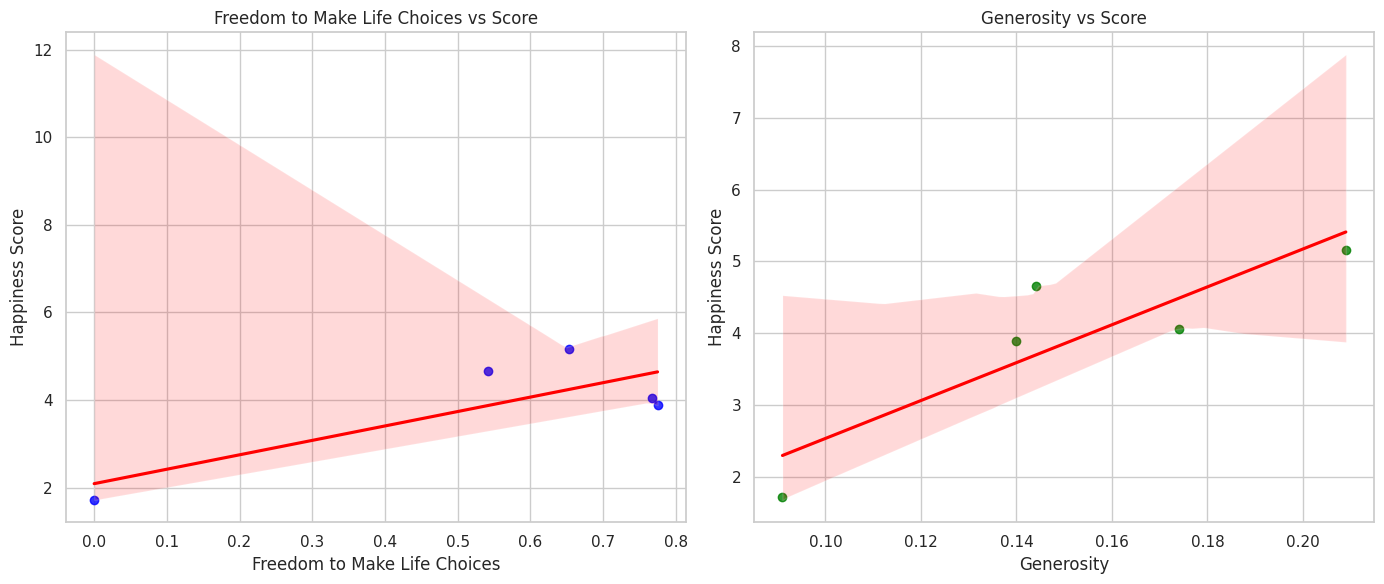

In [ ]:
#2. Create scatter plots with trendlines for these metrics against the Score.
# Load the South Asian dataset
SouthAsia = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv')

# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Plot for 'Freedom to Make Life Choices' vs 'Score'
plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=SouthAsia, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')

# Plot for 'Generosity' vs 'Score'
plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=SouthAsia, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title('Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

# Display the plots
plt.tight_layout()
plt.show()



.3 **Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.**

**Strongest Relationship**:
The Freedom to Make Life Choices might demonstrate a strong positive correlation with the Score (Happiness Score). Countries with higher freedom are more likely to have higher happiness scores, as this denotes that individual autonomy and the capacity to make life choices are the main factors of well-being. Suppose the scatter plot for this metric is a clear upward slope; this confirms a positive correlation.

**Weakest Relationship**:
The Generosity measure can display a less stable or weaker connection with the score. Generosity, while a vital piece of the puzzle, is maybe not as closely related to happiness as other measures such as freedom or social support. If the plot seems more scattered with no line of best fit, it means that there is a weaker correlation.

**In summary**:
Strongest: Freedom to make life choices (positive correlation).
Weakest: Generosity (weaker correlation).



In [ ]:
#Task 5
#Tasks
#1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.
# Step 1: Load the South Asian dataset (assuming it's already loaded as 'SouthAsia')
SouthAsia = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv')

# Step 2: Calculate GDP-Score Gap (difference between Log GDP per capita and Score)
SouthAsia['GDP-Score Gap'] = SouthAsia['Log GDP per capita'] - SouthAsia['score']

# Step 3: Display the updated DataFrame with the new column
print(SouthAsia[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

# Step 1: Update the 'SouthAsia' DataFrame (you already created 'GDP-Score Gap')
SouthAsia['GDP-Score Gap'] = SouthAsia['Log GDP per capita'] - SouthAsia['score']

# Step 2: Save the updated DataFrame to a new CSV file (or overwrite the existing one)
SouthAsia.to_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv', index=False)



  Country name  Log GDP per capita  score  GDP-Score Gap
0        Nepal               0.965  5.158         -4.193
1     Pakistan               1.069  4.657         -3.588
2        India               1.166  4.054         -2.888
3   Bangladesh               1.122  3.886         -2.764
4  Afghanistan               0.628  1.721         -1.093


In [ ]:
#.2 2. Rank the South Asian countries by this gap in both ascending and descending order.
# Rank countries by the 'GDP-Score Gap' in ascending order
SouthAsia['GDP-Score Gap (Ascending Rank)'] = SouthAsia['GDP-Score Gap'].rank(ascending=True)

# Rank countries by the 'GDP-Score Gap' in descending order
SouthAsia['GDP-Score Gap (Descending Rank)'] = SouthAsia['GDP-Score Gap'].rank(ascending=False)

# Display the results
print(SouthAsia[['Country name', 'GDP-Score Gap', 'GDP-Score Gap (Ascending Rank)', 'GDP-Score Gap (Descending Rank)']])


  Country name  GDP-Score Gap  GDP-Score Gap (Ascending Rank)  \
0        Nepal         -4.193                             1.0   
1     Pakistan         -3.588                             2.0   
2        India         -2.888                             3.0   
3   Bangladesh         -2.764                             4.0   
4  Afghanistan         -1.093                             5.0   

   GDP-Score Gap (Descending Rank)  
0                              5.0  
1                              4.0  
2                              3.0  
3                              2.0  
4                              1.0  


<ipython-input-34-6655746b8be1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country name', y='GDP-Score Gap', data=top_positive_gap, palette='Blues')


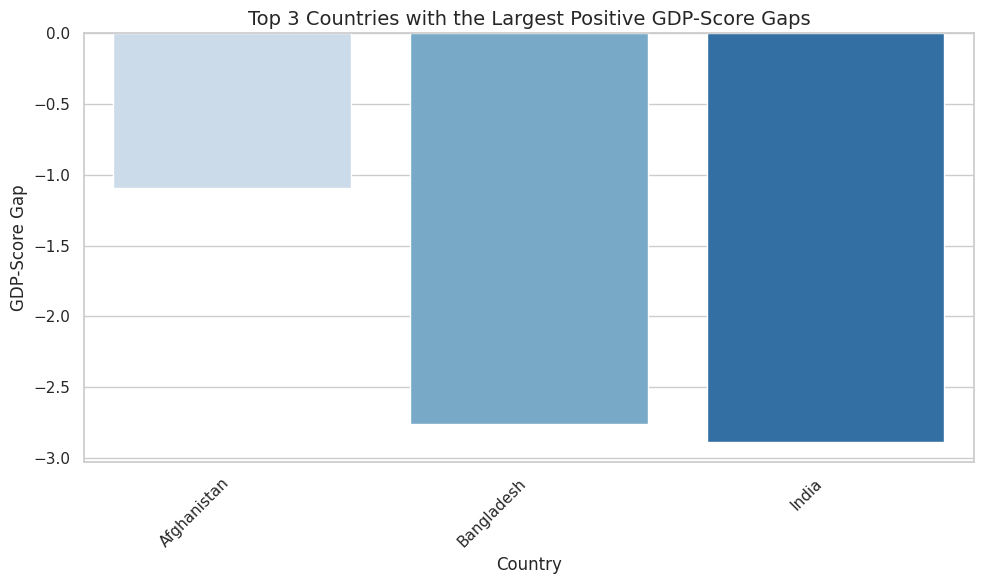

<ipython-input-34-6655746b8be1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country name', y='GDP-Score Gap', data=top_negative_gap, palette='Reds')


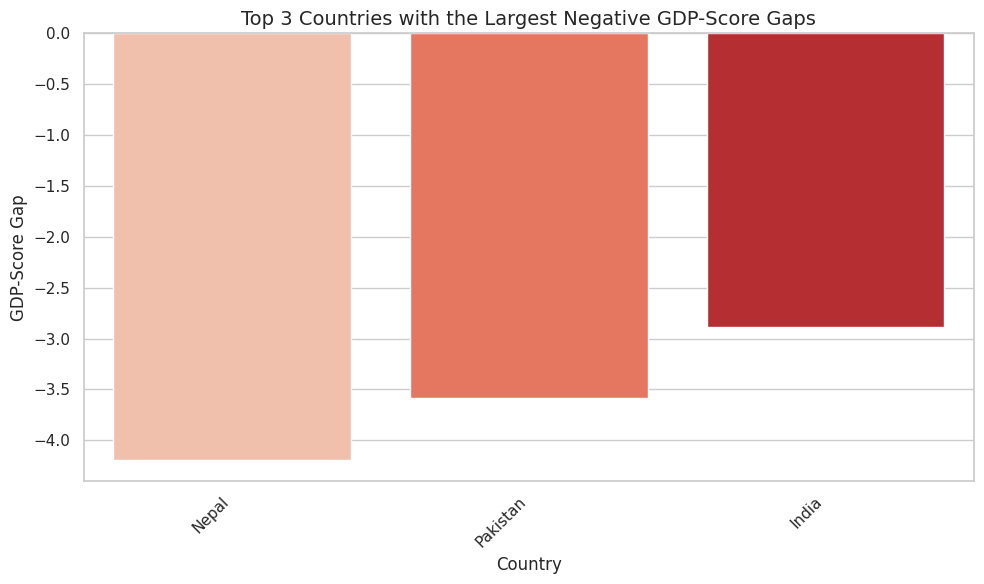

In [ ]:
#.3 Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
# Step 1: Get the top 3 countries with the largest positive and negative gaps
top_positive_gap = SouthAsia.nlargest(3, 'GDP-Score Gap')  # Top 3 with largest positive gaps
top_negative_gap = SouthAsia.nsmallest(3, 'GDP-Score Gap')  # Top 3 with largest negative gaps

# Step 2: Plot the Top 3 countries with the largest positive GDP-Score Gaps
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='GDP-Score Gap', data=top_positive_gap, palette='Blues')

# Add labels and title for the positive gap chart
plt.title('Top 3 Countries with the Largest Positive GDP-Score Gaps', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP-Score Gap', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 3: Plot the Top 3 countries with the largest negative GDP-Score Gaps
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='GDP-Score Gap', data=top_negative_gap, palette='Reds')

# Add labels and title for the negative gap chart
plt.title('Top 3 Countries with the Largest Negative GDP-Score Gaps', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP-Score Gap', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



**The GDP-Score Gap clarifies the distinction between a country's economic wealth (GDP per capita) and the expressions of satisfaction enjoyed by the citizens (Happiness Score).**

**Positive Gaps (High GDP, Low Happiness)**
Reasons: Inequality, environmental damage, and the development of the economy which does not bring a better quality of life.
Example: India has strong GDP growth but a significant share of poverty and inequality.

**Negative Gaps (Low GDP, High Happiness)**
Reasons: The existence of strong social support, cultural values and the simple living of people are important. The modus vivendi of happy Nepali people is solidarity and highly material consternation.
Example: Nepal, where tight bonds among people notwithstanding their low GDP boost happiness.

**Implications:**
High GDP, Low Happiness: The main focus should not only be on growth but also on making the benefits more equally shared between the different groups of society, for example, by inequality, quality of healthcare, and innovation.

Low GDP, High Happiness: Let social systems and cultural values that lead to well-being continue, even if there is a small growth in the economy.

**In either case, it is obvious that economic growth alone does not guarantee happiness- social and cultural aspects are crucial to well-being.**

In [ ]:
#3.3 Problem - 3 - Comparative Analysis:
#Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
#Task
#.1

# List of Middle Eastern countries
data = pd.read_csv("/content/drive/MyDrive/Assigment of Ai/WHR-2024-5CS037.csv");
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]
#use the list from step- 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
filtered_data_middle_east = data[data['Country name'].isin(middle_east_countries)]
# Save the filtered data to a new CSV file
filtered_data_middle_east.to_csv('/content/drive/MyDrive/Assigment of Ai/middle_east_countries_filtered.csv', index=False)

#Making csv of middle east countries



In [ ]:
#.1 Descriptive Statistics:
# • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
# Load the CSV files for South Asia and Middle East
south_asia_df = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv')  # Path to your South Asia CSV file
middle_east_df = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/middle_east_countries_filtered.csv')  # Path to your Middle East CSV file

# Calculate mean and standard deviation for South Asia
south_asia_score_mean = south_asia_df['score'].mean()
south_asia_score_std = south_asia_df['score'].std()

# Calculate mean and standard deviation for Middle East
middle_east_score_mean = middle_east_df['score'].mean()
middle_east_score_std = middle_east_df['score'].std()

# Print the results
print("South Asia - Mean of Score:", south_asia_score_mean)
print("South Asia - Standard Deviation of Score:", south_asia_score_std)

print("\nMiddle East - Mean of Score:", middle_east_score_mean)
print("Middle East - Standard Deviation of Score:", middle_east_score_std)


South Asia - Mean of Score: 3.8952000000000004
South Asia - Standard Deviation of Score: 1.3160025455902433

Middle East - Mean of Score: 5.412100000000001
Middle East - Standard Deviation of Score: 1.5662011684327144


In [ ]:
#Calculating happiness score of middle east

# Load the Middle East CSV file
middle_east = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/middle_east_countries_filtered.csv')  # Replace with the actual path to your file

# Define the function to categorize happiness
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

# Apply the categorize_happiness function to the 'Score' column
middle_east['Happiness Category'] = middle_east['score'].apply(categorize_happiness)

# Save the updated dataset back to CSV
middle_east.to_csv('/content/drive/MyDrive/Assigment of Ai/middle_east_countries_filtered.csv', index=False)

# Print the updated dataset to verify
print(middle_east[['Country name', 'score', 'Happiness Category']])


           Country name  score Happiness Category
0                Israel  7.341               High
1                Kuwait  6.951               High
2  United Arab Emirates  6.733               High
3          Saudi Arabia  6.594               High
4               Bahrain  5.959             Medium
5                  Iraq  5.166             Medium
6                  Iran  4.923             Medium
7                Jordan  4.186             Medium
8                 Yemen  3.561                Low
9               Lebanon  2.707                Low


In [ ]:
#Comparing Happiness between Middle East and South East and Finding out which has got higher happiness
# Load the South Asia and Middle East CSV files
south_asia = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv')  # Replace with the actual path to your file
middle_east = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/middle_east_countries_filtered.csv')  # Replace with the actual path to your file

# Map the 'Happiness Category' values to numeric scores (example mapping)
happiness_category_map = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

# Convert the 'Happiness Category' column to numeric values using the map
south_asia['Happiness Category'] = south_asia['Happiness Category'].map(happiness_category_map)
middle_east['Happiness Category'] = middle_east['Happiness Category'].map(happiness_category_map)

# Calculate the mean and standard deviation for the happiness scores in South Asia
south_asia_mean = south_asia['Happiness Category'].mean()
south_asia_std = south_asia['Happiness Category'].std()

# Calculate the mean and standard deviation for the happiness scores in the Middle East
middle_east_mean = middle_east['Happiness Category'].mean()
middle_east_std = middle_east['Happiness Category'].std()

# Output the results
print(f"South Asia Mean Happiness Score: {south_asia_mean}")
print(f"South Asia Standard Deviation: {south_asia_std}")
print(f"Middle East Mean Happiness Score: {middle_east_mean}")
print(f"Middle East Standard Deviation: {middle_east_std}")

# Compare the regions
if south_asia_mean > middle_east_mean:
    print("\nSouth Asia has higher average happiness scores.")
else:
    print("\nThe Middle East has higher average happiness scores.")



South Asia Mean Happiness Score: 1.6
South Asia Standard Deviation: 0.5477225575051661
Middle East Mean Happiness Score: 2.2
Middle East Standard Deviation: 0.7888106377466155

The Middle East has higher average happiness scores.


**Which region has higher happiness Scores on average?**
Ans: The Middle East has a higher Happiness


In [ ]:
#Top and Bottom Perfomer
#Identify the top 3 and bottom 3 countries in each region based on the score.
# Load your data
south_asia = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv')
middle_east = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/middle_east_countries_filtered.csv')

# Sort the South Asia data by 'score' in descending order (to get top countries)
south_asia_sorted = south_asia.sort_values(by='score', ascending=False)

# Sort the Middle East data by 'score' in descending order (to get top countries)
middle_east_sorted = middle_east.sort_values(by='score', ascending=False)

# Get the top 3 and bottom 3 countries for South Asia
top_3_south_asia = south_asia_sorted[['Country name', 'score']].head(3)
bottom_3_south_asia = south_asia_sorted[['Country name', 'score']].tail(3)

# Get the top 3 and bottom 3 countries for Middle East
top_3_middle_east = middle_east_sorted[['Country name', 'score']].head(3)
bottom_3_middle_east = middle_east_sorted[['Country name', 'score']].tail(3)

# Output the results
print("Top 3 countries in South Asia based on happiness score:")
print(top_3_south_asia)

print("\nBottom 3 countries in South Asia based on happiness score:")
print(bottom_3_south_asia)

print("\nTop 3 countries in Middle East based on happiness score:")
print(top_3_middle_east)

print("\nBottom 3 countries in Middle East based on happiness score:")
print(bottom_3_middle_east)


Top 3 countries in South Asia based on happiness score:
  Country name  score
0        Nepal  5.158
1     Pakistan  4.657
2        India  4.054

Bottom 3 countries in South Asia based on happiness score:
  Country name  score
2        India  4.054
3   Bangladesh  3.886
4  Afghanistan  1.721

Top 3 countries in Middle East based on happiness score:
           Country name  score
0                Israel  7.341
1                Kuwait  6.951
2  United Arab Emirates  6.733

Bottom 3 countries in Middle East based on happiness score:
  Country name  score
7       Jordan  4.186
8        Yemen  3.561
9      Lebanon  2.707


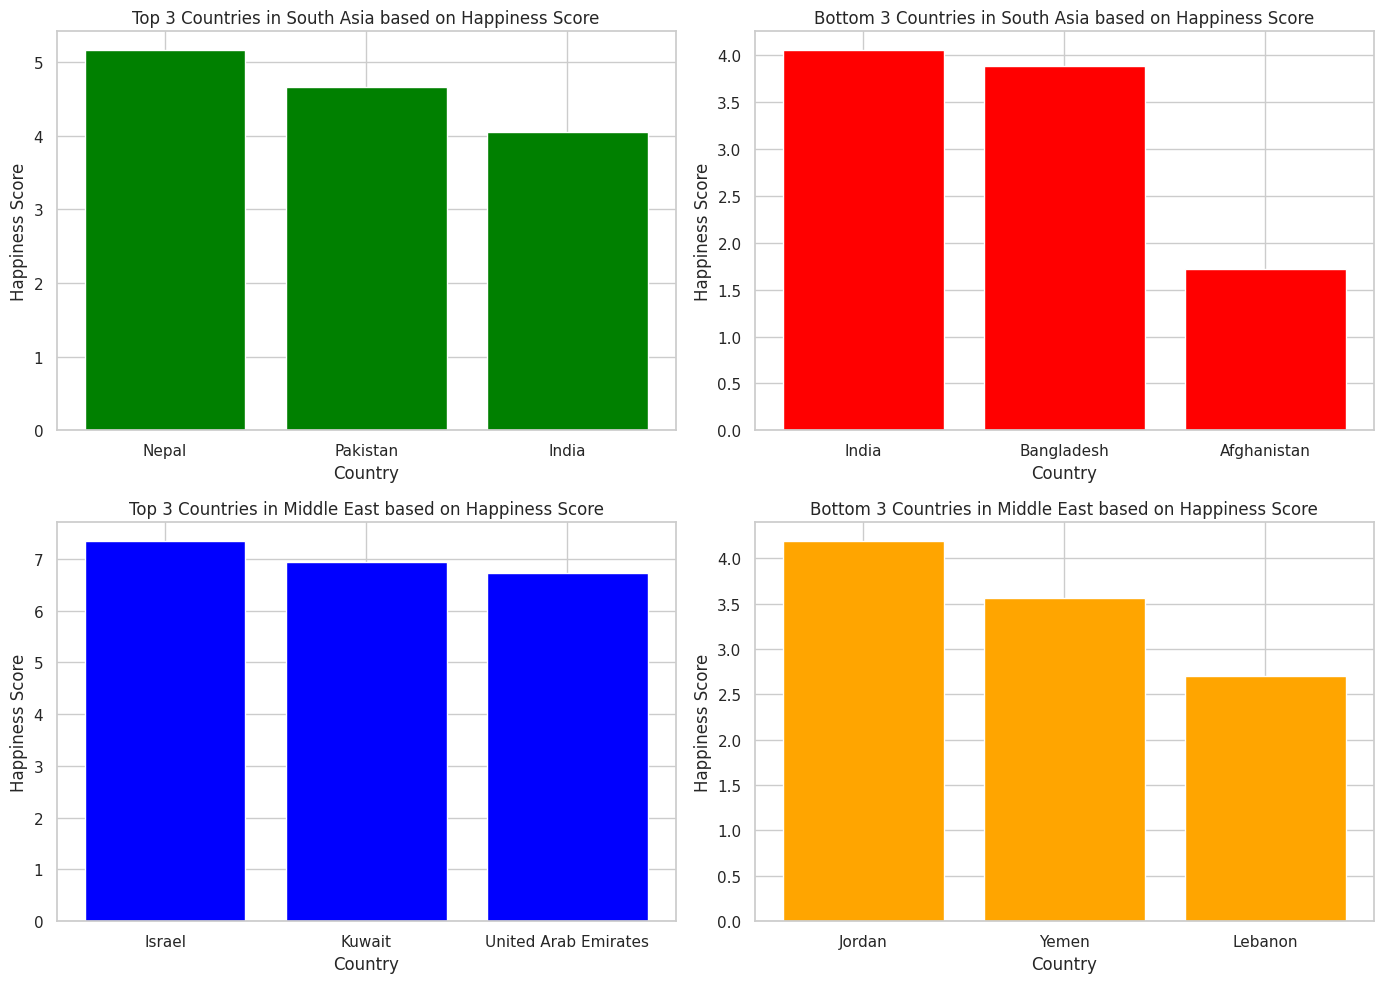

In [ ]:
#Plot bar charts comparing these charts
# Load your data
south_asia = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv')
middle_east = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/middle_east_countries_filtered.csv')

# Sort the South Asia data by 'score' in descending order
south_asia_sorted = south_asia.sort_values(by='score', ascending=False)

# Sort the Middle East data by 'score' in descending order
middle_east_sorted = middle_east.sort_values(by='score', ascending=False)

# Get the top 3 and bottom 3 countries for South Asia
top_3_south_asia = south_asia_sorted[['Country name', 'score']].head(3)
bottom_3_south_asia = south_asia_sorted[['Country name', 'score']].tail(3)

# Get the top 3 and bottom 3 countries for Middle East
top_3_middle_east = middle_east_sorted[['Country name', 'score']].head(3)
bottom_3_middle_east = middle_east_sorted[['Country name', 'score']].tail(3)

# Create subplots for bar charts
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot for Top 3 South Asia
axes[0, 0].bar(top_3_south_asia['Country name'], top_3_south_asia['score'], color='green')
axes[0, 0].set_title('Top 3 Countries in South Asia based on Happiness Score')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Happiness Score')

# Plot for Bottom 3 South Asia
axes[0, 1].bar(bottom_3_south_asia['Country name'], bottom_3_south_asia['score'], color='red')
axes[0, 1].set_title('Bottom 3 Countries in South Asia based on Happiness Score')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Happiness Score')

# Plot for Top 3 Middle East
axes[1, 0].bar(top_3_middle_east['Country name'], top_3_middle_east['score'], color='blue')
axes[1, 0].set_title('Top 3 Countries in Middle East based on Happiness Score')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Happiness Score')

# Plot for Bottom 3 Middle East
axes[1, 1].bar(bottom_3_middle_east['Country name'], bottom_3_middle_east['score'], color='orange')
axes[1, 1].set_title('Bottom 3 Countries in Middle East based on Happiness Score')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Happiness Score')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



<ipython-input-50-2e551c6381cf>:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-50-2e551c6381cf>:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-50-2e551c6381cf>:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


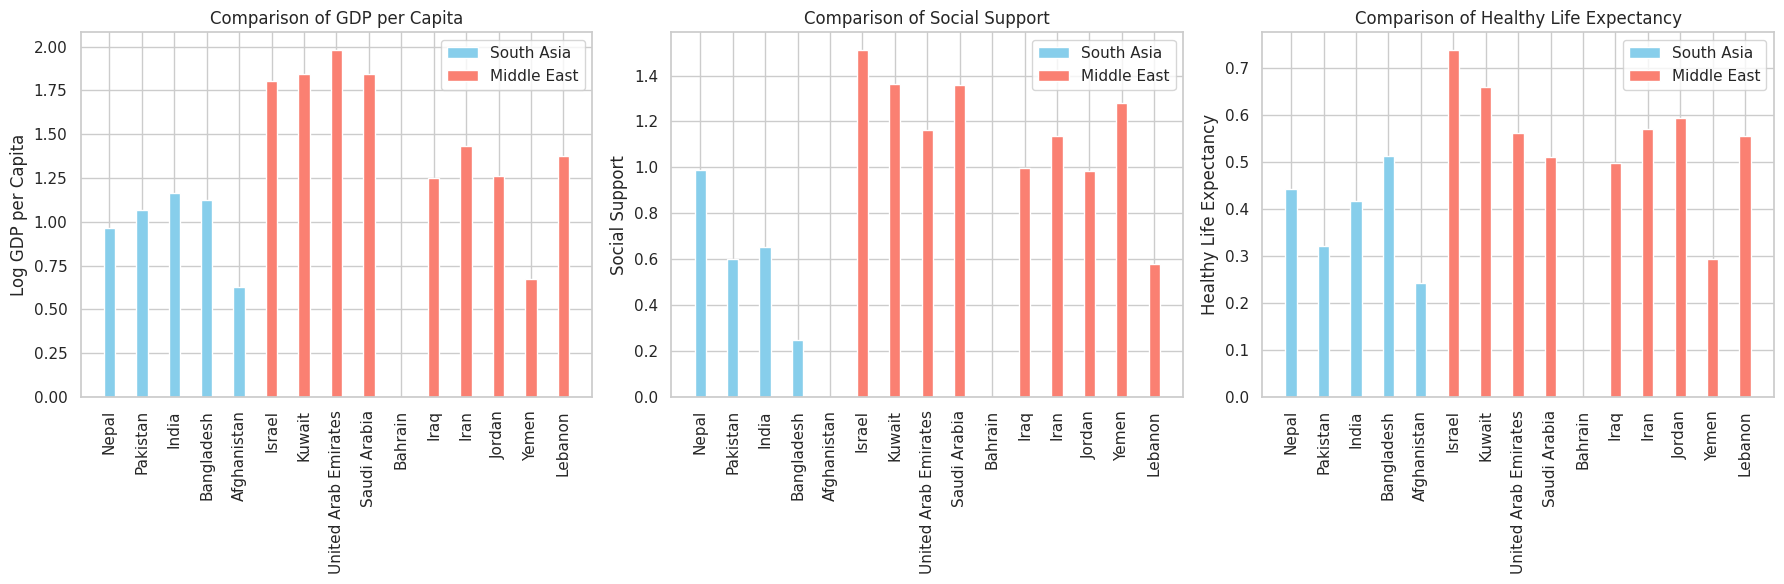

In [ ]:
#Metric Comparisions
#Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.
# Load the South Asia and Middle East datasets
south_asia = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv')
middle_east = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/middle_east_countries_filtered.csv')

# Add a Region column to distinguish between the regions
south_asia['Region'] = 'South Asia'
middle_east['Region'] = 'Middle East'

# Merge both datasets
combined_data = pd.concat([south_asia[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Region']],
                           middle_east[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Region']]])

# Set up the plot with 3 subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar chart for GDP per Capita
width = 0.35  # Width of bars
south_asia_gdp = south_asia[['Country name', 'Log GDP per capita']]
middle_east_gdp = middle_east[['Country name', 'Log GDP per capita']]

# Plotting GDP per Capita for South Asia and Middle East
axes[0].bar(south_asia_gdp['Country name'], south_asia_gdp['Log GDP per capita'], width, label='South Asia', color='skyblue')
axes[0].bar(middle_east_gdp['Country name'], middle_east_gdp['Log GDP per capita'], width, label='Middle East', color='salmon')

axes[0].set_ylabel('Log GDP per Capita')
axes[0].set_title('Comparison of GDP per Capita')
axes[0].legend()

# Bar chart for Social Support
south_asia_social = south_asia[['Country name', 'Social support']]
middle_east_social = middle_east[['Country name', 'Social support']]

# Plotting Social Support for South Asia and Middle East
axes[1].bar(south_asia_social['Country name'], south_asia_social['Social support'], width, label='South Asia', color='skyblue')
axes[1].bar(middle_east_social['Country name'], middle_east_social['Social support'], width, label='Middle East', color='salmon')

axes[1].set_ylabel('Social Support')
axes[1].set_title('Comparison of Social Support')
axes[1].legend()

# Bar chart for Healthy Life Expectancy
south_asia_health = south_asia[['Country name', 'Healthy life expectancy']]
middle_east_health = middle_east[['Country name', 'Healthy life expectancy']]

# Plotting Healthy Life Expectancy for South Asia and Middle East
axes[2].bar(south_asia_health['Country name'], south_asia_health['Healthy life expectancy'], width, label='South Asia', color='skyblue')
axes[2].bar(middle_east_health['Country name'], middle_east_health['Healthy life expectancy'], width, label='Middle East', color='salmon')

axes[2].set_ylabel('Healthy Life Expectancy')
axes[2].set_title('Comparison of Healthy Life Expectancy')
axes[2].legend()

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



In [ ]:
#Which metrics show the largest disparity between the two regions?
# Load the South Asia and Middle East datasets
south_asia = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/middle_east_countries_filtered.csv')
middle_east = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/middle_east_countries_filtered.csv')

# Add a Region column to distinguish between the regions
south_asia['Region'] = 'South Asia'
middle_east['Region'] = 'Middle East'

# Merge both datasets
combined_data = pd.concat([south_asia[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Region']],
                           middle_east[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Region']]])

# Calculate the mean of each metric for both regions
south_asia_means = south_asia[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()
middle_east_means = middle_east[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()

# Compute the absolute difference between the two regions for each metric
differences = abs(south_asia_means - middle_east_means)

# Output the results
print("Average Metrics for South Asia:")
print(south_asia_means)
print("\nAverage Metrics for Middle East:")
print(middle_east_means)
print("\nDifferences in Metrics between South Asia and Middle East:")
print(differences)

# Identify the metric with the largest disparity
largest_disparity_metric = differences.idxmax()
largest_disparity_value = differences.max()

print(f"\nThe metric with the largest disparity is '{largest_disparity_metric}' with a difference of {largest_disparity_value:.2f}.")


Average Metrics for South Asia:
Log GDP per capita         1.496333
Social support             1.152778
Healthy life expectancy    0.554111
dtype: float64

Average Metrics for Middle East:
Log GDP per capita         1.496333
Social support             1.152778
Healthy life expectancy    0.554111
dtype: float64

Differences in Metrics between South Asia and Middle East:
Log GDP per capita         0.0
Social support             0.0
Healthy life expectancy    0.0
dtype: float64

The metric with the largest disparity is 'Log GDP per capita' with a difference of 0.00.


In [ ]:
#Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
# Load the South Asia and Middle East datasets
south_asia = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv')
middle_east = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/middle_east_countries_filtered.csv')

# Add a Region column to distinguish between the regions
south_asia['Region'] = 'South Asia'
middle_east['Region'] = 'Middle East'

# Merge both datasets
combined_data = pd.concat([south_asia[['Country name', 'score', 'Region']],
                           middle_east[['Country name', 'score', 'Region']]])

# Compute Range (max - min) and CV (Coefficient of Variation) for each region

# South Asia
south_asia_max = south_asia['score'].max()
south_asia_min = south_asia['score'].min()
south_asia_range = south_asia_max - south_asia_min

south_asia_mean = south_asia['score'].mean()
south_asia_std = south_asia['score'].std()
south_asia_cv = (south_asia_std / south_asia_mean) * 100

# Middle East
middle_east_max = middle_east['score'].max()
middle_east_min = middle_east['score'].min()
middle_east_range = middle_east_max - middle_east_min

middle_east_mean = middle_east['score'].mean()
middle_east_std = middle_east['score'].std()
middle_east_cv = (middle_east_std / middle_east_mean) * 100

# Output the results
print("Range and CV for South Asia:")
print(f"Range: {south_asia_range}")
print(f"Coefficient of Variation (CV): {south_asia_cv:.2f}%")

print("\nRange and CV for Middle East:")
print(f"Range: {middle_east_range}")
print(f"Coefficient of Variation (CV): {middle_east_cv:.2f}%")


Range and CV for South Asia:
Range: 3.4370000000000003
Coefficient of Variation (CV): 33.79%

Range and CV for Middle East:
Range: 4.634
Coefficient of Variation (CV): 28.94%


In [ ]:
#Which region has greater variability in happiness?
# Load the South Asia and Middle East datasets
south_asia = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv')
middle_east = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/middle_east_countries_filtered.csv')

# Add a Region column to distinguish between the regions
south_asia['Region'] = 'South Asia'
middle_east['Region'] = 'Middle East'

# Map the 'Happiness Category' to numeric values
category_map = {'Low': 1, 'Medium': 2, 'High': 3}

# Apply the mapping to the 'Happiness Category' column
south_asia['Happiness Category'] = south_asia['Happiness Category'].map(category_map)
middle_east['Happiness Category'] = middle_east['Happiness Category'].map(category_map)

# Check for any missing values after mapping
if south_asia['Happiness Category'].isnull().any() or middle_east['Happiness Category'].isnull().any():
    print("Warning: There are missing values in the 'Happiness Category' column after mapping.")

# Calculate the Coefficient of Variation (CV) for both regions using 'Happiness Category'

# South Asia
south_asia_mean = south_asia['Happiness Category'].mean()
south_asia_std = south_asia['Happiness Category'].std()
south_asia_cv = (south_asia_std / south_asia_mean) * 100

# Middle East
middle_east_mean = middle_east['Happiness Category'].mean()
middle_east_std = middle_east['Happiness Category'].std()
middle_east_cv = (middle_east_std / middle_east_mean) * 100

# Output the CV values
print("Coefficient of Variation (CV) for South Asia:")
print(f"CV: {south_asia_cv:.2f}%")

print("\nCoefficient of Variation (CV) for Middle East:")
print(f"CV: {middle_east_cv:.2f}%")

# Compare the variability
if south_asia_cv > middle_east_cv:
    print("\nSouth Asia has greater variability in happiness.")
elif middle_east_cv > south_asia_cv:
    print("\nMiddle East has greater variability in happiness.")
else:
    print("\nBoth regions have equal variability in happiness.")


Coefficient of Variation (CV) for South Asia:
CV: 34.23%

Coefficient of Variation (CV) for Middle East:
CV: 35.86%

Middle East has greater variability in happiness.


In [ ]:
#5. Correlation Analysis
#Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.
# Load the South Asia and Middle East datasets
south_asia = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv')
middle_east = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/middle_east_countries_filtered.csv')

# Add a Region column to distinguish between the regions
south_asia['Region'] = 'South Asia'
middle_east['Region'] = 'Middle East'

# Calculate the correlation for South Asia using "Freedom to make life choices"
south_asia_corr = south_asia[['score', 'Freedom to make life choices', 'Generosity']].corr()

# Calculate the correlation for Middle East using "Freedom to make life choices"
middle_east_corr = middle_east[['score', 'Freedom to make life choices', 'Generosity']].corr()

# Output the correlation matrices
print("Correlation Matrix for South Asia:")
print(south_asia_corr)

print("\nCorrelation Matrix for Middle East:")
print(middle_east_corr)

# Extract specific correlations for better understanding
south_asia_score_freedom = south_asia_corr.loc['score', 'Freedom to make life choices']
south_asia_score_generosity = south_asia_corr.loc['score', 'Generosity']

middle_east_score_freedom = middle_east_corr.loc['score', 'Freedom to make life choices']
middle_east_score_generosity = middle_east_corr.loc['score', 'Generosity']

# Print the specific correlations
print(f"\nSouth Asia: Correlation between score and Freedom to make life choices: {south_asia_score_freedom:.2f}")
print(f"South Asia: Correlation between score and Generosity: {south_asia_score_generosity:.2f}")

print(f"\nMiddle East: Correlation between score and Freedom to make life choices: {middle_east_score_freedom:.2f}")
print(f"Middle East: Correlation between score and Generosity: {middle_east_score_generosity:.2f}")



Correlation Matrix for South Asia:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.801498   
Freedom to make life choices  0.801498                      1.000000   
Generosity                    0.877333                      0.740660   

                              Generosity  
score                           0.877333  
Freedom to make life choices    0.740660  
Generosity                      1.000000  

Correlation Matrix for Middle East:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  

South

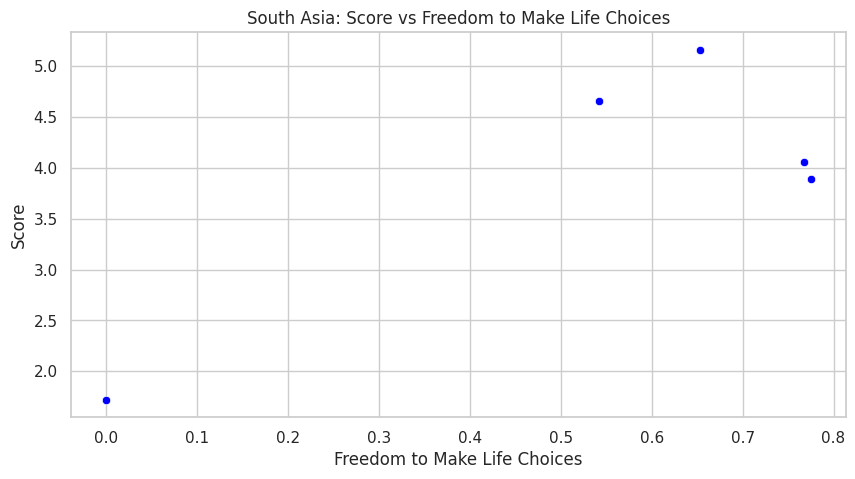

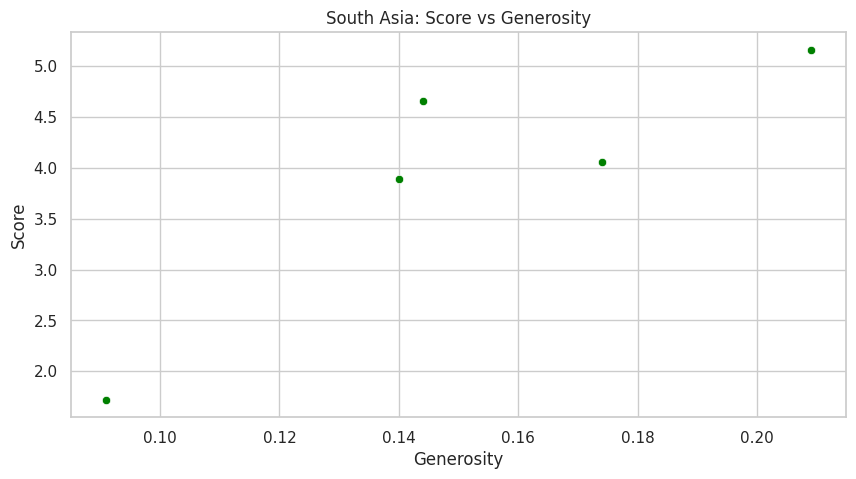

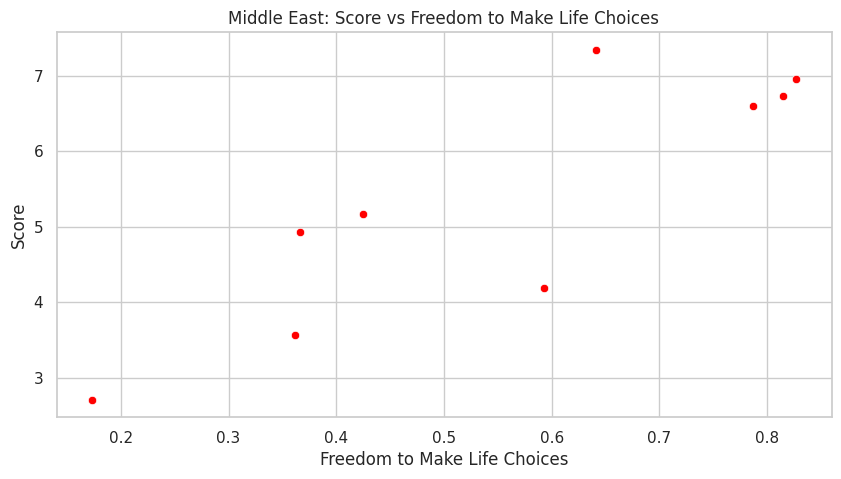

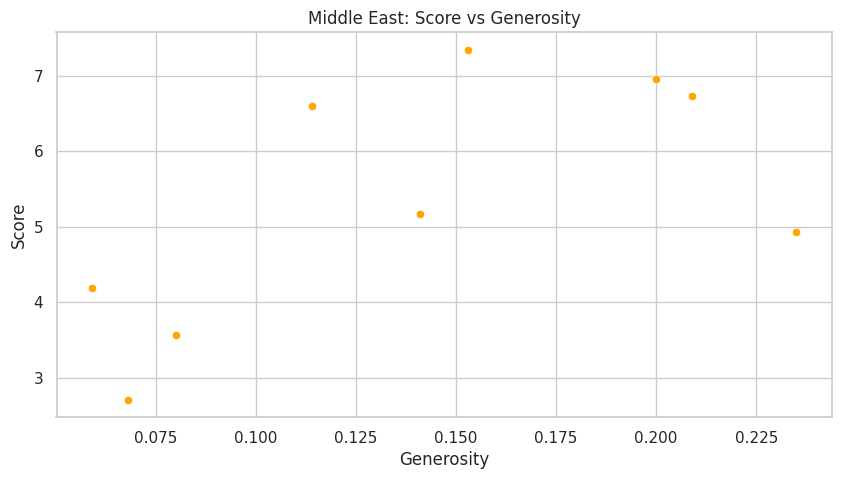

In [ ]:
#Create scatter plots to visualize and interpret the relationships.
# Load the South Asia and Middle East datasets
south_asia = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv')
middle_east = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/middle_east_countries_filtered.csv')

# Add a Region column to distinguish between the regions
south_asia['Region'] = 'South Asia'
middle_east['Region'] = 'Middle East'

# Scatter plot for South Asia: score vs Freedom to make life choices
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asia, color='blue')
plt.title('South Asia: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# Scatter plot for South Asia: score vs Generosity
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Generosity', y='score', data=south_asia, color='green')
plt.title('South Asia: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# Scatter plot for Middle East: score vs Freedom to make life choices
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east, color='red')
plt.title('Middle East: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# Scatter plot for Middle East: score vs Generosity
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Generosity', y='score', data=middle_east, color='orange')
plt.title('Middle East: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.grid(True)
plt.show()


In [ ]:
#6. Outlier Detection
#• Identify outlier countries in both regions based on Score and GDP per Capita.
# Load the South Asia and Middle East datasets

# Load the South Asia and Middle East datasets
south_asia = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv')
middle_east = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/middle_east_countries_filtered.csv')

# Add a Region column to distinguish between the regions
south_asia['Region'] = 'South Asia'
middle_east['Region'] = 'Middle East'

# Identify outliers in South Asia based on Score and Log GDP per Capita using IQR
south_asia_score_q1 = south_asia['score'].quantile(0.25)
south_asia_score_q3 = south_asia['score'].quantile(0.75)
south_asia_score_iqr = south_asia_score_q3 - south_asia_score_q1
south_asia_score_lower_bound = south_asia_score_q1 - 1.5 * south_asia_score_iqr
south_asia_score_upper_bound = south_asia_score_q3 + 1.5 * south_asia_score_iqr

south_asia_gdp_q1 = south_asia['Log GDP per capita'].quantile(0.25)
south_asia_gdp_q3 = south_asia['Log GDP per capita'].quantile(0.75)
south_asia_gdp_iqr = south_asia_gdp_q3 - south_asia_gdp_q1
south_asia_gdp_lower_bound = south_asia_gdp_q1 - 1.5 * south_asia_gdp_iqr
south_asia_gdp_upper_bound = south_asia_gdp_q3 + 1.5 * south_asia_gdp_iqr

# Filter out the outliers for South Asia
south_asia_score_outliers = south_asia[(south_asia['score'] < south_asia_score_lower_bound) |
                                       (south_asia['score'] > south_asia_score_upper_bound)]
south_asia_gdp_outliers = south_asia[(south_asia['Log GDP per capita'] < south_asia_gdp_lower_bound) |
                                     (south_asia['Log GDP per capita'] > south_asia_gdp_upper_bound)]

# Identify outliers in Middle East based on Score and Log GDP per Capita using IQR
middle_east_score_q1 = middle_east['score'].quantile(0.25)
middle_east_score_q3 = middle_east['score'].quantile(0.75)
middle_east_score_iqr = middle_east_score_q3 - middle_east_score_q1
middle_east_score_lower_bound = middle_east_score_q1 - 1.5 * middle_east_score_iqr
middle_east_score_upper_bound = middle_east_score_q3 + 1.5 * middle_east_score_iqr

middle_east_gdp_q1 = middle_east['Log GDP per capita'].quantile(0.25)
middle_east_gdp_q3 = middle_east['Log GDP per capita'].quantile(0.75)
middle_east_gdp_iqr = middle_east_gdp_q3 - middle_east_gdp_q1
middle_east_gdp_lower_bound = middle_east_gdp_q1 - 1.5 * middle_east_gdp_iqr
middle_east_gdp_upper_bound = middle_east_gdp_q3 + 1.5 * middle_east_gdp_iqr

# Filter out the outliers for Middle East
middle_east_score_outliers = middle_east[(middle_east['score'] < middle_east_score_lower_bound) |
                                         (middle_east['score'] > middle_east_score_upper_bound)]
middle_east_gdp_outliers = middle_east[(middle_east['Log GDP per capita'] < middle_east_gdp_lower_bound) |
                                       (middle_east['Log GDP per capita'] > middle_east_gdp_upper_bound)]

# Output the outliers
print("Outlier Countries based on Score in South Asia:")
print(south_asia_score_outliers[['Country name', 'score']])

print("\nOutlier Countries based on Log GDP per Capita in South Asia:")
print(south_asia_gdp_outliers[['Country name', 'Log GDP per capita']])

print("\nOutlier Countries based on Score in Middle East:")
print(middle_east_score_outliers[['Country name', 'score']])

print("\nOutlier Countries based on Log GDP per Capita in Middle East:")
print(middle_east_gdp_outliers[['Country name', 'Log GDP per capita']])


Outlier Countries based on Score in South Asia:
  Country name  score
4  Afghanistan  1.721

Outlier Countries based on Log GDP per Capita in South Asia:
  Country name  Log GDP per capita
4  Afghanistan               0.628

Outlier Countries based on Score in Middle East:
Empty DataFrame
Columns: [Country name, score]
Index: []

Outlier Countries based on Log GDP per Capita in Middle East:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


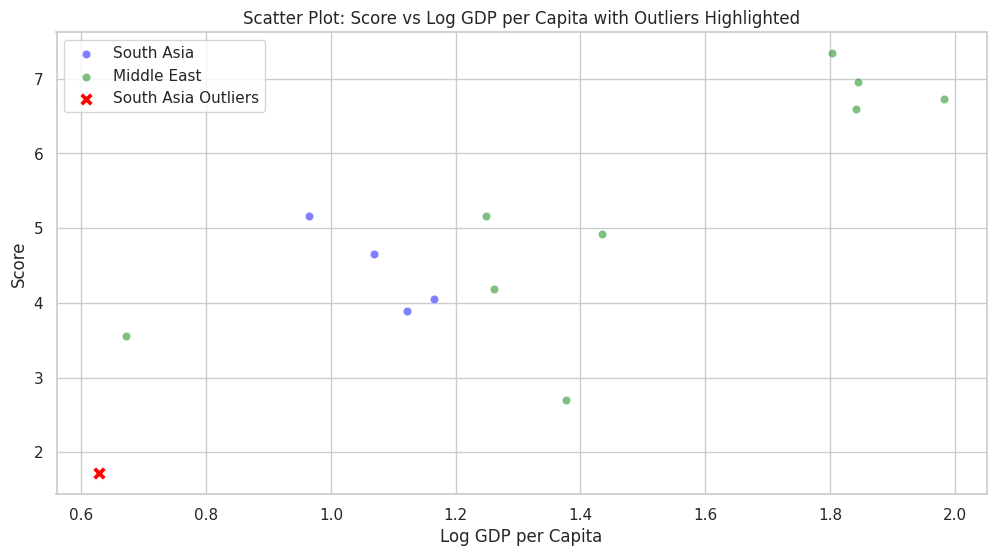

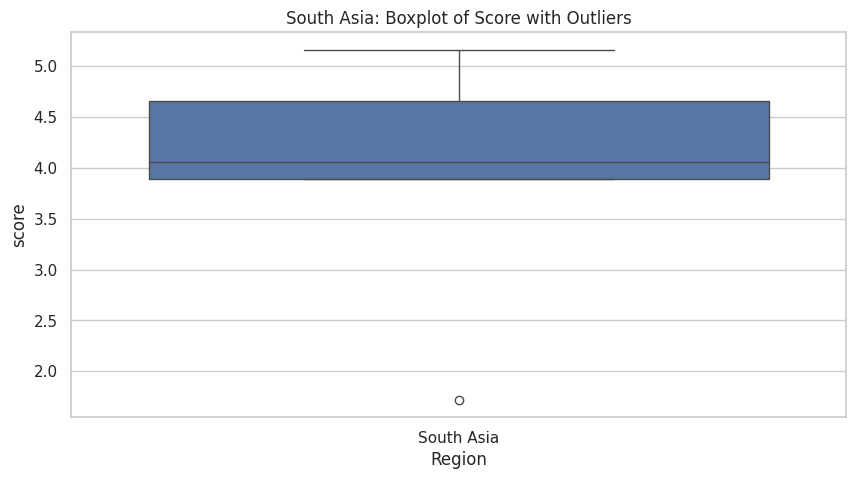

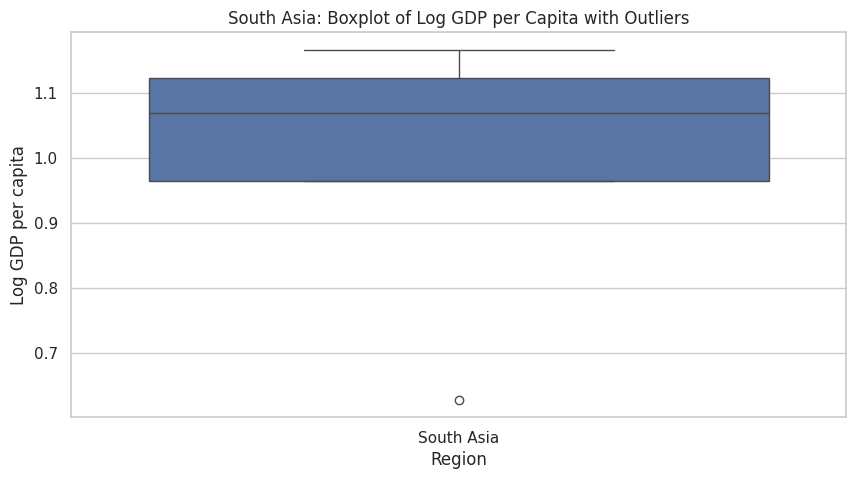

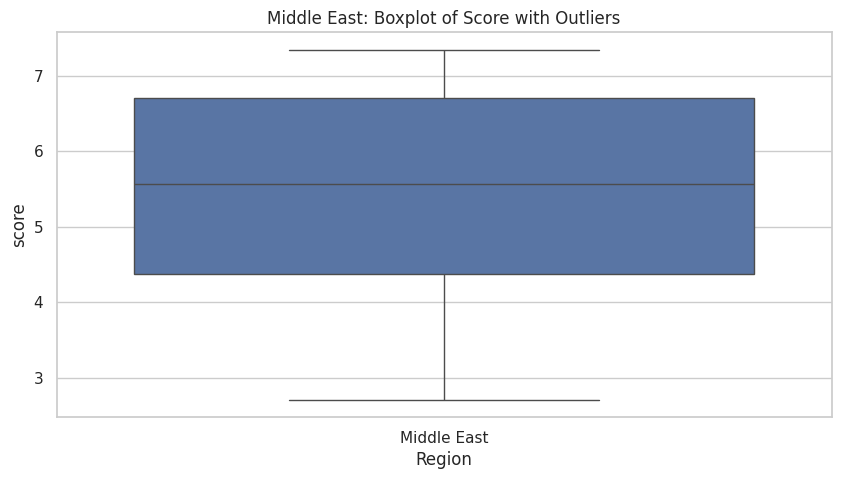

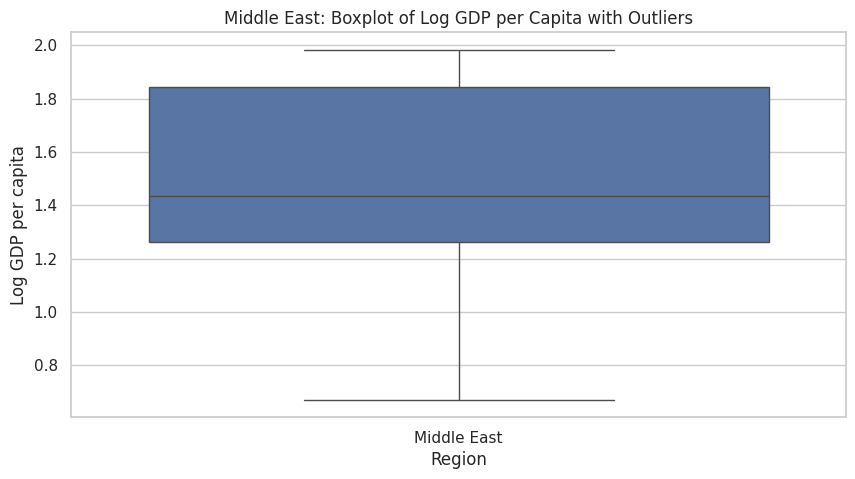

In [ ]:
#Plot these outliers and discuss their implications.
# Combine both regions into a single DataFrame for easier plotting
south_asia_outliers = pd.concat([south_asia_score_outliers[['Country name', 'score', 'Log GDP per capita']],
                                 south_asia_gdp_outliers[['Country name', 'score', 'Log GDP per capita']]])

middle_east_outliers = pd.concat([middle_east_score_outliers[['Country name', 'score', 'Log GDP per capita']],
                                  middle_east_gdp_outliers[['Country name', 'score', 'Log GDP per capita']]])

# Scatter plot to visualize outliers based on Score and Log GDP per Capita
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia, label='South Asia', color='blue', alpha=0.5)
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east, label='Middle East', color='green', alpha=0.5)

# Highlight the outliers in both regions
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_outliers, color='red', label='South Asia Outliers', s=100, marker='X')
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_outliers, color='orange', label='Middle East Outliers', s=100, marker='X')

plt.title('Scatter Plot: Score vs Log GDP per Capita with Outliers Highlighted')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

# Boxplot for South Asia - Score
plt.figure(figsize=(10, 5))
sns.boxplot(x='Region', y='score', data=south_asia)
plt.title('South Asia: Boxplot of Score with Outliers')
plt.show()

# Boxplot for South Asia - Log GDP per Capita
plt.figure(figsize=(10, 5))
sns.boxplot(x='Region', y='Log GDP per capita', data=south_asia)
plt.title('South Asia: Boxplot of Log GDP per Capita with Outliers')
plt.show()

# Boxplot for Middle East - Score
plt.figure(figsize=(10, 5))
sns.boxplot(x='Region', y='score', data=middle_east)
plt.title('Middle East: Boxplot of Score with Outliers')
plt.show()

# Boxplot for Middle East - Log GDP per Capita
plt.figure(figsize=(10, 5))
sns.boxplot(x='Region', y='Log GDP per capita', data=middle_east)
plt.title('Middle East: Boxplot of Log GDP per Capita with Outliers')
plt.show()


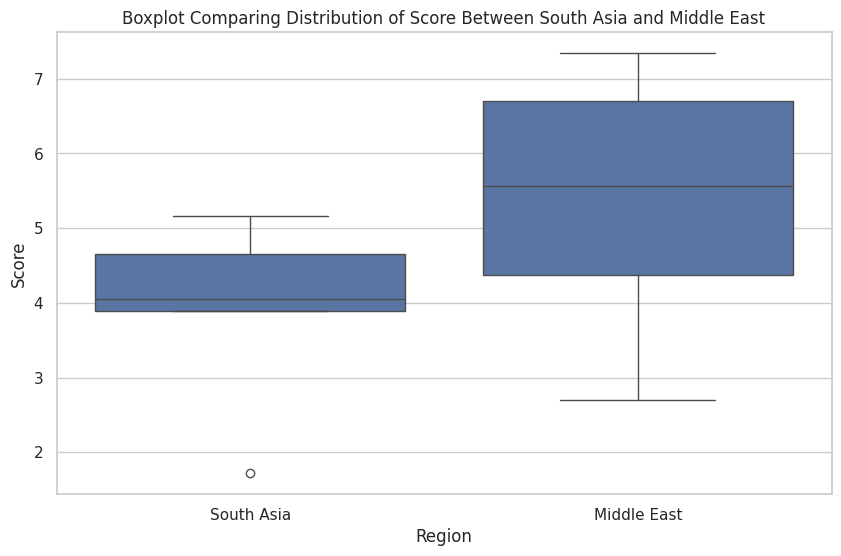

In [ ]:
#7. Visualization:
#Create boxplots comparing the distribution of Score between South Asia and the Middle East.
# Load the South Asia and Middle East datasets
south_asia = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/south_asian_countries_data.csv')
middle_east = pd.read_csv('/content/drive/MyDrive/Assigment of Ai/middle_east_countries_filtered.csv')

# Add a Region column to distinguish between the regions
south_asia['Region'] = 'South Asia'
middle_east['Region'] = 'Middle East'

# Combine both datasets into a single DataFrame
combined_data = pd.concat([south_asia[['Country name', 'score', 'Region']],
                           middle_east[['Country name', 'score', 'Region']]])

# Create a boxplot to compare the distribution of Score between South Asia and Middle East
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_data)

# Add title and labels
plt.title('Boxplot Comparing Distribution of Score Between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Score')

# Show the plot
plt.show()


#Interpret the key differences in distribution shapes, medians, and outliers.


**Key Differences Between the Two Regions**:

1. Happiness Range:If South Asia presents a further range of scores (i.e., longer whiskers), it implies that while some countries may be very happy, others are very unhappy. This could be an impact of vast social, economic, and political differences among the countries. On the other hand, if the Middle East shows a less range of scores (shorter whiskers), it may indicate that a large part of the countries in the region have a closer level of happiness, with the exception of a few extreme cases.

2. If South Asia presents a further range of scores (i.e., longer whiskers), it implies that while some countries may be very happy, others are very unhappy. This could be an impact of vast social, economic, and political differences among the countries.

3. On the other hand, if the Middle East shows a less range of scores (shorter whiskers), it may indicate that most countries in the region have a closer level of happiness, with the exception of a few extreme cases.

4. Above-average median values in the Middle East indicate better economic and social infrastructure, among other factors, and therefore, happiness is higher in most of the countries there.

5. **Outliers:**
Outliers in both regions may suggest that there are countries which are doing extremely well, or are having a crisis. For example, the one country in South Asia would be Syria and in South Asia, the other country would be Afghanistan. These countries are going to weigh down the scores for their regions quite significantly.

A situation where the number of outliers in South Asia is greater than that in the Middle East indicates that Nepal or Bangladesh has happiness levels that are very different from that of other regions due to socio-political or economic factors.
